#Problem Statment 2 :- Glass
#Prepare a model for glass classification using KNN

##Data Description:

###RI : refractive index

###Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)

###Mg: Magnesium

###AI: Aluminum

###Si: Silicon

###K:Potassium

###Ca: Calcium

###Ba: Barium

###Fe: Iron

##Type: Type of glass: (class attribute)
###1 -- building_windows_float_processed
###2 --building_windows_non_float_processed
###3 --vehicle_windows_float_processed
###4 --vehicle_windows_non_float_processed (none in this database)
###5 --containers
###6 --tableware
###7 --headlamps







In [1]:
# Importing Necessary Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,KFold

import warnings
warnings.filterwarnings('ignore')


##Import Dataset

In [2]:
glass=pd.read_csv('/content/glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


# Data Understanding

In [3]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
glass.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [5]:
glass.shape

(214, 10)

In [6]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [7]:
glass.drop_duplicates(inplace=True)

In [8]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,1.518348,13.404085,2.679202,1.449484,72.655070,0.498873,8.954085,0.175869,0.057277,2.788732
std,0.003033,0.816662,1.443691,0.495925,0.773998,0.653185,1.425882,0.498245,0.097589,2.105130
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,1.519150,13.810000,3.600000,1.630000,73.090000,0.610000,9.150000,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [9]:
glass['Type'].unique()

array([1, 2, 3, 5, 6, 7])

In [10]:
glass['Type'].value_counts().sort_index(ascending=True)

1    69
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

# Exploratary Data Analysis

##Outliers Detection

<Axes: xlabel='Fe'>

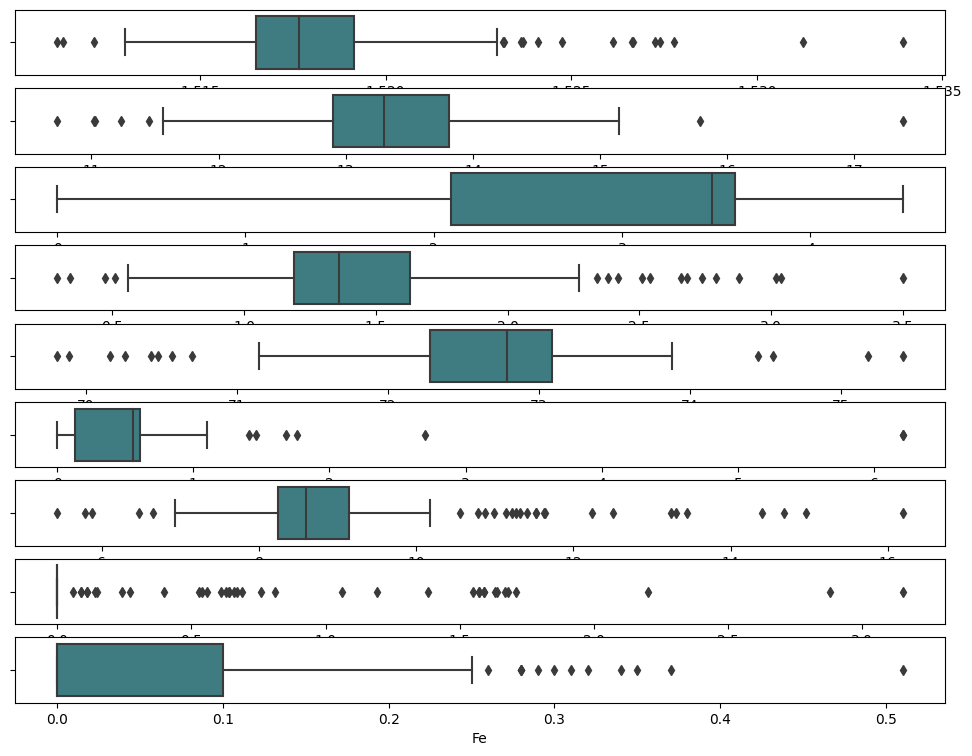

In [11]:
outliers=glass.copy()
fig,axes=plt.subplots(9,1,figsize=(12,9),sharex=False,sharey=False)
sns.boxplot(x='RI',data=outliers,palette='crest',ax=axes[0])
sns.boxplot(x='Na',data=outliers,palette='crest',ax=axes[1])
sns.boxplot(x='Mg',data=outliers,palette='crest',ax=axes[2])
sns.boxplot(x='Al',data=outliers,palette='crest',ax=axes[3])
sns.boxplot(x='Si',data=outliers,palette='crest',ax=axes[4])
sns.boxplot(x='K' ,data=outliers,palette='crest',ax=axes[5])
sns.boxplot(x='Ca',data=outliers,palette='crest',ax=axes[6])
sns.boxplot(x='Ba',data=outliers,palette='crest',ax=axes[7])
sns.boxplot(x='Fe',data=outliers,palette='crest',ax=axes[8])

<Axes: >

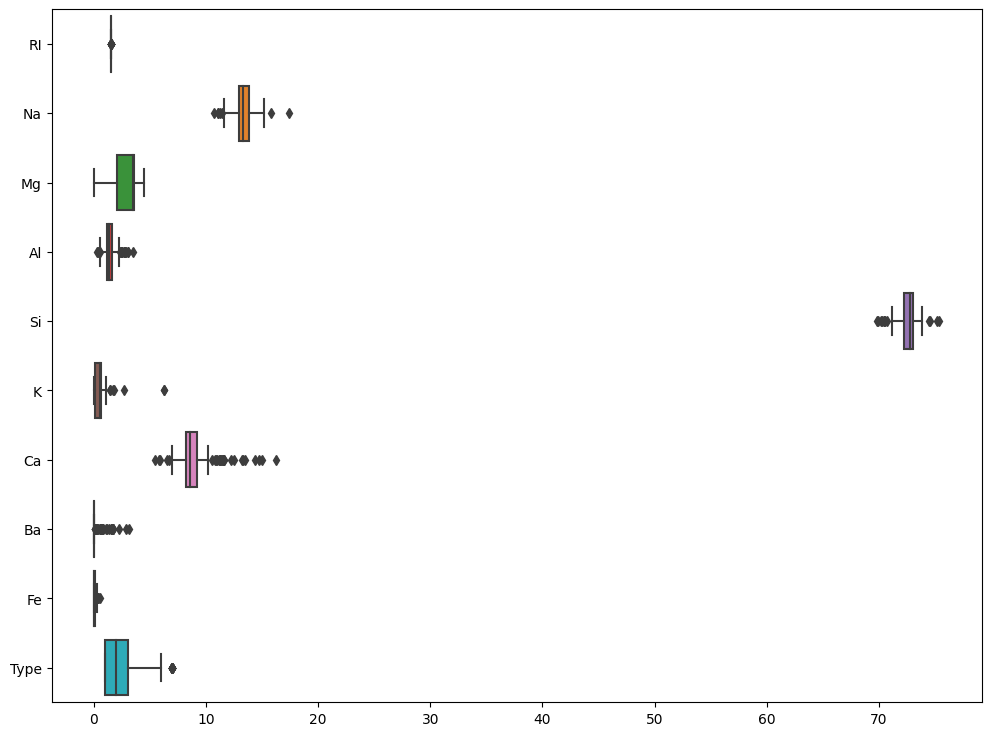

In [12]:
plt.figure(figsize=(12,9))
sns.boxplot(data=glass,orient='h')


###Not surprisingly, the element Silicon has a significantly higher average value compared to the other constituents, as we observed in the previous section. This is expected since glass primarily consists of silica, which is predominantly composed of Silicon.

#Correlation of the Data

<Axes: >

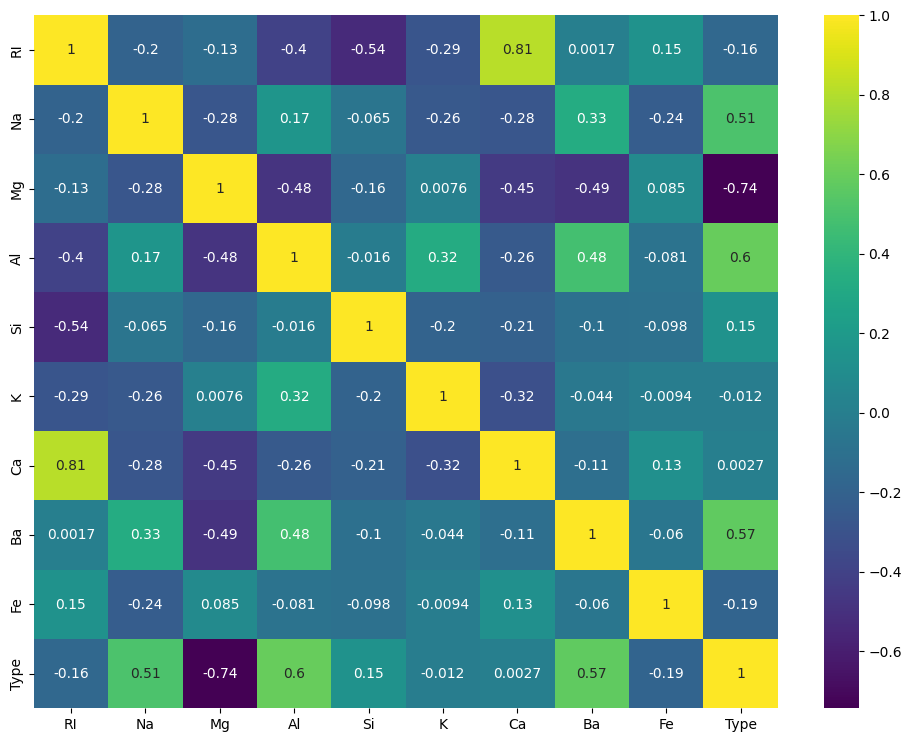

In [13]:
fig,ax=plt.subplots(figsize=(12,9))
sns.heatmap(glass.corr(),annot=True,linecolor='Black',xticklabels='auto',yticklabels='auto',cmap='viridis')

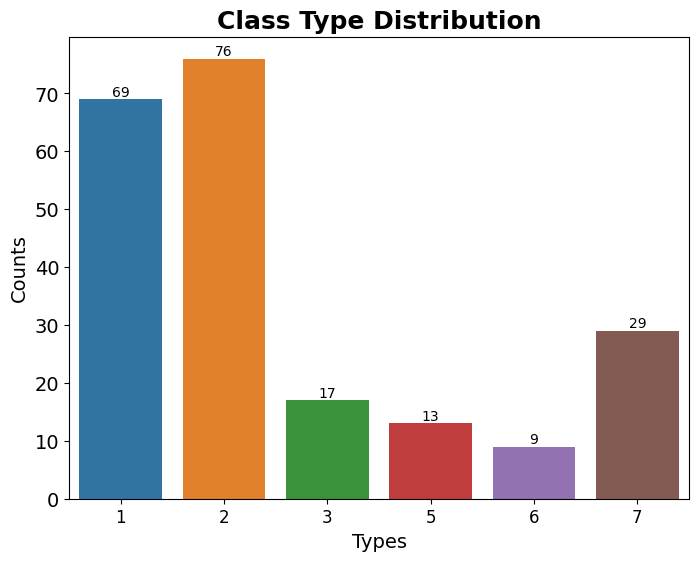

In [14]:
plt.figure(figsize=(8,6))
ax=sns.barplot(x=glass['Type'].value_counts().index.tolist(),y=glass['Type'].value_counts().tolist())
plt.title('Class Type Distribution',fontsize = 18,fontweight = 'bold')
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel('Types',fontsize = 14)
plt.ylabel('Counts',fontsize = 14)
for i in ax.containers:
  ax.bar_label (i,)

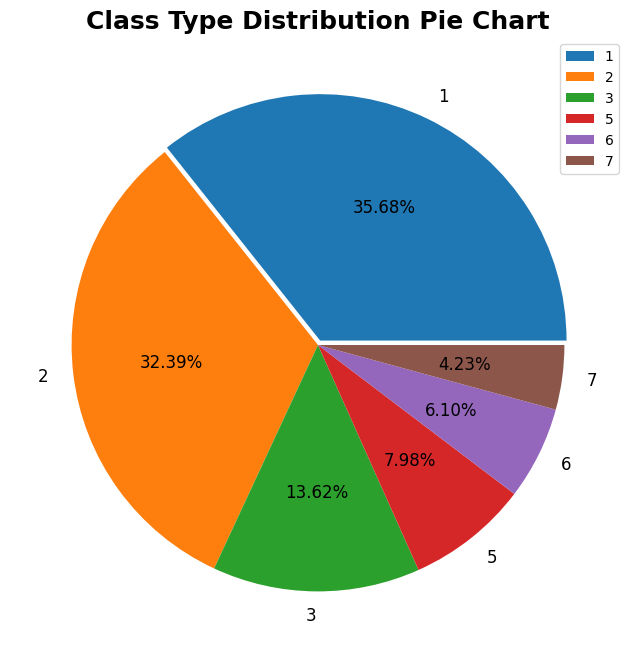

In [15]:
plt.figure(figsize=(10,8))
plt.pie(glass['Type'].value_counts(),
        labels=glass.Type.unique(),
        explode=[0.02,0.0,0.0,0.0,0.0,0.0],
        autopct='%.2f%%',textprops={'size':'large'})
plt.legend(loc='upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

#Data Preprocessing

### Hunting and Removing the multiple outliers

In [20]:
# Detect observations with more than one outlier
features=glass.columns[:-1].tolist()
def outliers_hunt(df):            #Takes a dataframe df of features and returns a list of the indices
                                  #corresponding to the observations containing more than 2 outliers
  outliers_indices=[]

  #Iterate over features (Columns)
  for col in df.columns.tolist():
    Q1=np.percentile(df[col],25)   #1st quartile 25%
    Q3=np.percentile(df[col],75)   #2nd Quartile 75%
    IQR=Q3-Q1                      # Interquartile range
    outlier_step=1.5*IQR           #Outliers step

    # Determine a list of indices of outliers for feature columns
    outliers_list_col=df[(df[col]<Q1-outlier_step)|(df[col] > Q3 + outlier_step )].index

    #append the found outlier indices for col to the list of outlier indices
    outliers_indices.extend(outliers_list_col)
  # Select Observations containing more than 2 outliers
  outliers_indices=Counter(outliers_indices)
  multiple_outliers=list( k for k, v in outlier_indices.items() if v > 2 )
  return multiple_outliers
print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(glass[features]))))

The dataset contains 14 observations with more than 2 outliers


In [21]:
outlier_indices = outlier_hunt(glass[features])
df = glass.drop(outlier_indices).reset_index(drop=True)
print(df.shape)
df.head()



(199, 10)


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


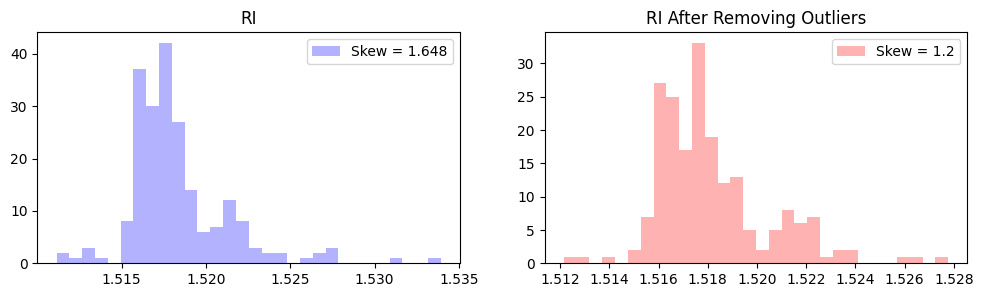

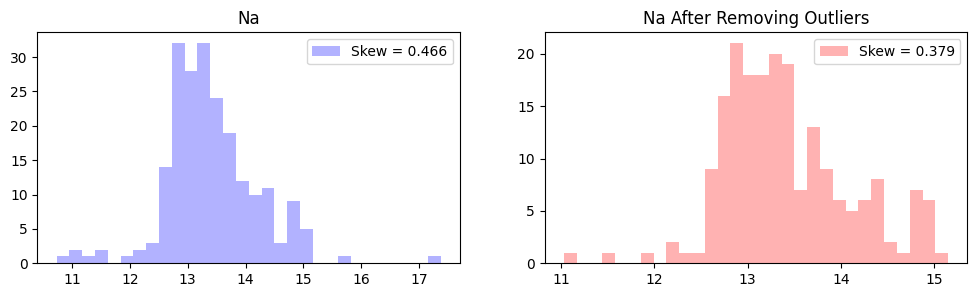

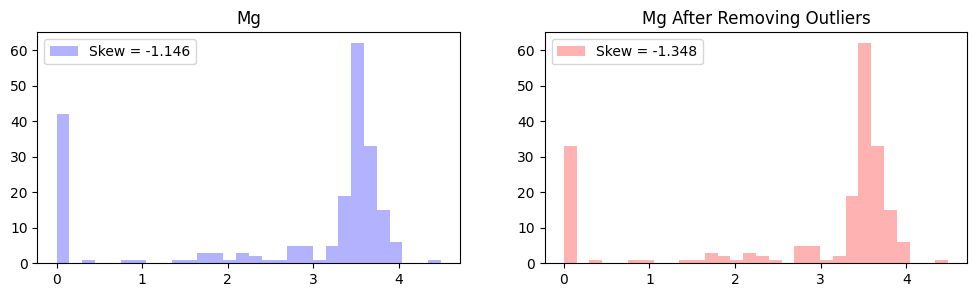

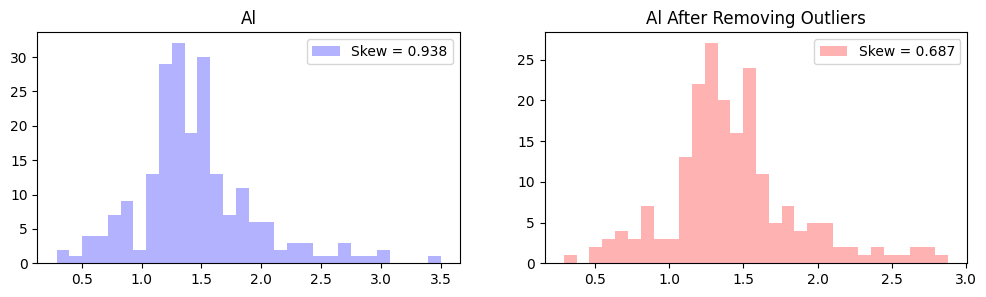

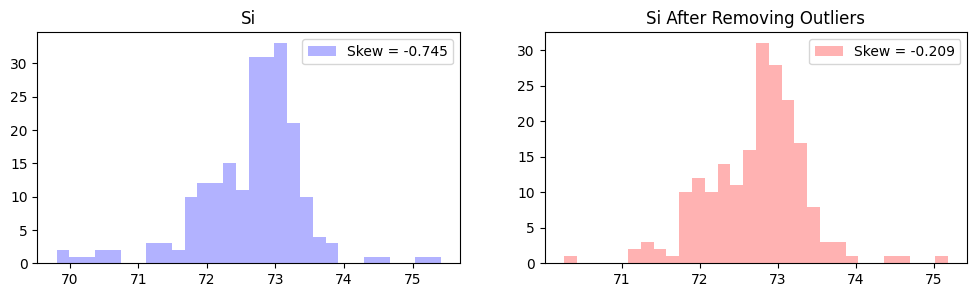

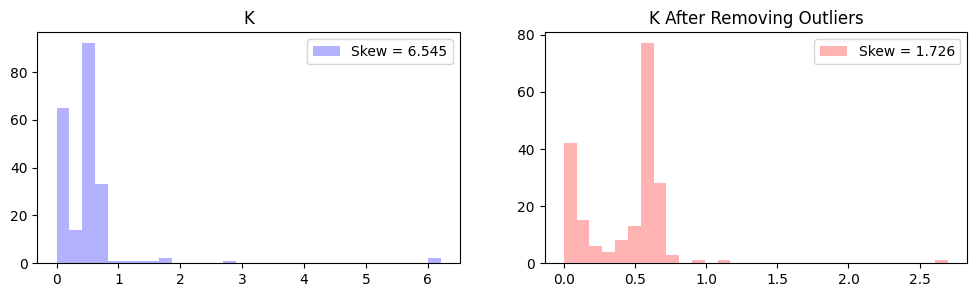

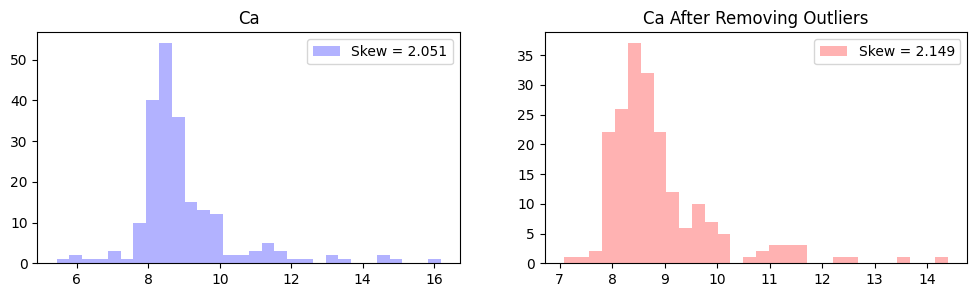

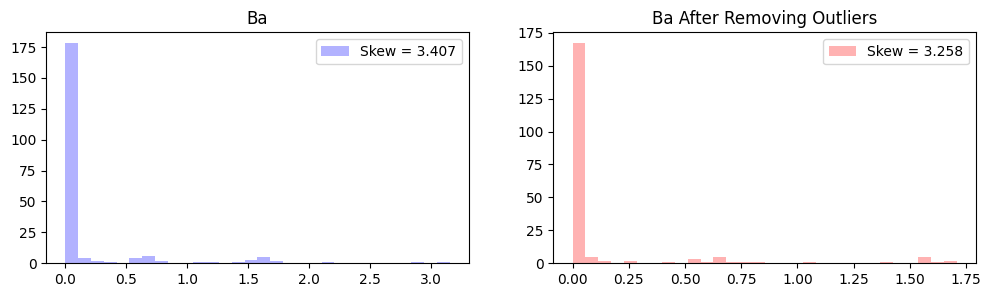

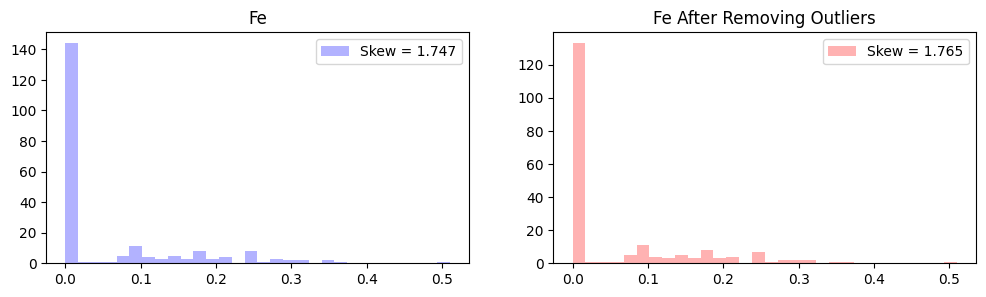

In [22]:
for feature in features:
    fig, ax = plt.subplots(1,2,figsize=(12,3))
    ax[0].hist(glass[feature], color='blue', bins=30, alpha=0.3, label='Skew = %s' %(str(round(glass[feature].skew(),3))))
    ax[0].set_title(str(feature))
    ax[0].legend(loc=0)

    ax[1].hist(df[feature], color='red', bins=30, alpha=0.3, label='Skew = %s' %(str(round(df[feature].skew(),3))))
    ax[1].set_title(str(feature)+' After Removing Outliers')
    ax[1].legend(loc=0)
    plt.show()

#Train Test Split

In [23]:
X=df.drop('Type',axis=1)
y=df['Type']

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
print("Shape of X_train : ",X_train.shape)
print("Shape of X_test  : ",X_test.shape)
print("Shape of y_train : ",y_train.shape)
print("Shape of y_test  : ",y_test.shape)

Shape of X_train :  (159, 9)
Shape of X_test  :  (40, 9)
Shape of y_train :  (159,)
Shape of y_test  :  (40,)


#Standardize the variable

In [26]:
std = StandardScaler()

X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

##Choose the value for K?

###Grid search for choosing the best Value of K

In [28]:
# Get score for different values of n
k_list = np.arange(1, 40, 2)
mean_scores = []
accuracy_list = []
error_rate = []

for i in k_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(40,1)
    pred_i = pred_i.ravel()
    score = cross_val_score(knn,X_train, y_train,cv= 10)
    mean_scores.append(np.mean(score))
    error_rate.append(np.mean(pred_i != y_test))

In [29]:
n_neighbors = np.array([2*i+1 for i in range(1,20)])
param_grid = dict(n_neighbors=n_neighbors)
n_neighbors

array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])

In [30]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv= 10)
grid.fit(X, y)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35,
       37, 39])})

In [31]:
print(grid.best_score_)
print(grid.best_params_)

0.6634210526315789
{'n_neighbors': 3}


#Visualization of  the CV results

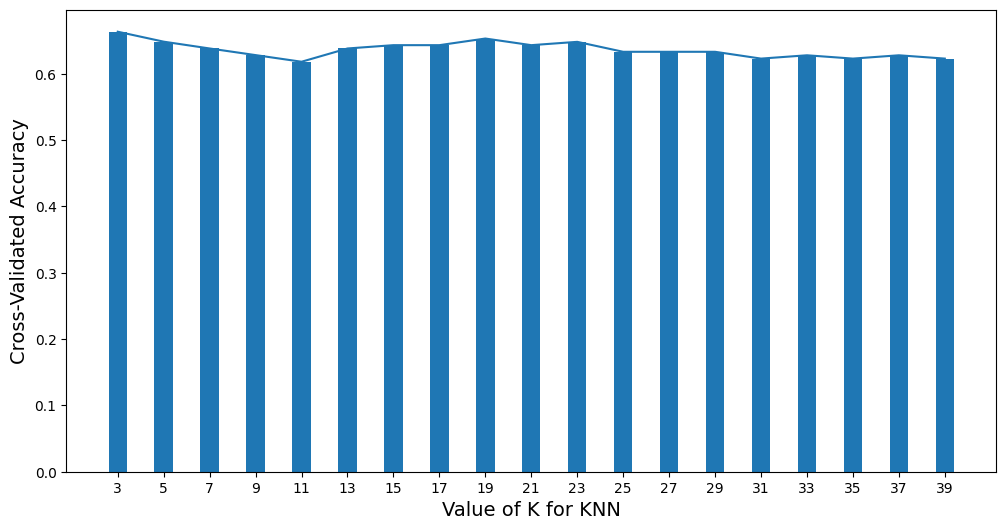

In [32]:
k_range = np.array([2*i+1 for i in range(1,20)])
k_scores = []

# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors= k)
    scores = cross_val_score(knn, X, y, cv= 10)
    k_scores.append(scores.mean())

plt.figure(figsize=(12,6))
plt.bar(k_range, k_scores)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN', fontsize = 14)
plt.ylabel('Cross-Validated Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

In [33]:
pd.DataFrame(k_scores).sort_values(0,ascending=False).head(10)


,0
0,0.663421
8,0.653158
1,0.648421
10,0.648158
6,0.643158
7,0.643158
9,0.643158
5,0.638158
2,0.638158
11,0.633158


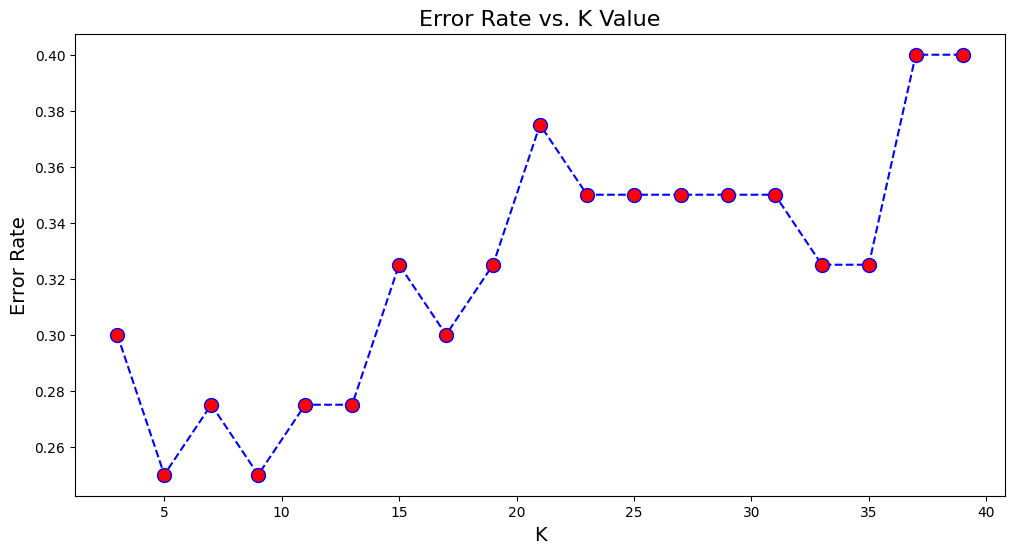

In [36]:
error_rate = []
k_range = [i for i in range(3,40, 2)]

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    pred_i = pred_i.reshape(40,1)
    pred_i = pred_i.ravel()
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(12,6))
plt.plot([i for i in range(3,40,2)],error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value', fontsize = 16)
plt.xlabel('K', fontsize = 14)
plt.ylabel('Error Rate', fontsize = 14)
plt.show()

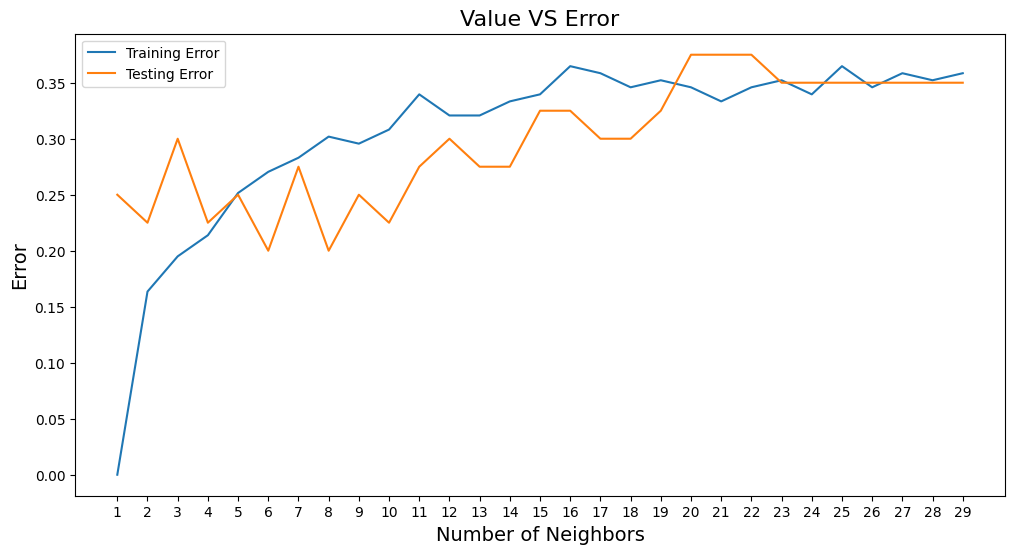

In [41]:
error1 = []
error2 = []
k_range = [i for i in range(1, 30)]

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_pred1 = knn.predict(X_train)
    y_pred1 = y_pred1.ravel()
    error1.append(np.mean(y_train != y_pred1))

    y_pred2 = knn.predict(X_test)
    y_pred2 = y_pred2.ravel()
    error2.append(np.mean(y_test != y_pred2))

plt.figure(figsize=[12, 6])
plt.plot(k_range, error1, label='Training Error')
plt.plot(k_range, error2, label='Testing Error')
plt.legend()
plt.title('Value VS Error', fontsize=16)
plt.xlabel('Number of Neighbors', fontsize=14)
plt.ylabel('Error', fontsize=14)
plt.xticks(k_range)
plt.show()


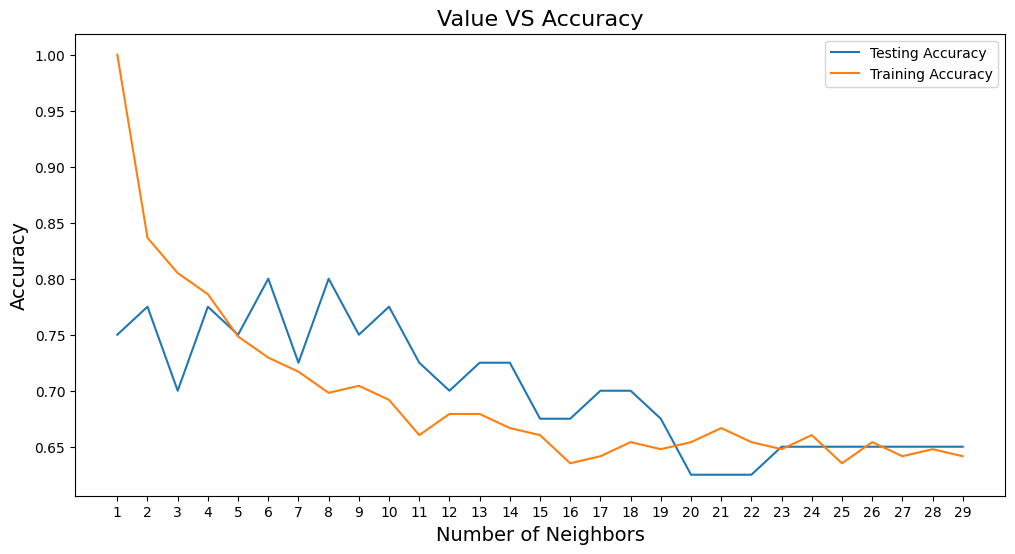

In [42]:
train_accuracy = []
test_accuracy = []

k_range = [i for i in range(1,30)]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    train_accuracy.append(knn.score(X_train,y_train))
    test_accuracy.append(knn.score(X_test,y_test))

plt.figure(figsize=[12,6])
plt.plot(k_range, test_accuracy, label = 'Testing Accuracy')
plt.plot(k_range, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy', fontsize = 16)
plt.xlabel('Number of Neighbors', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.xticks(k_range)
plt.show()

#Applying KNN


#### Applying KNN using K=3

In [43]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=3')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=3


[[10  4  0  0  0  0]
 [ 3  8  0  1  0  0]
 [ 3  0  0  0  0  0]
 [ 0  1  0  3  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.62      0.71      0.67        14
           2       0.62      0.67      0.64        12
           3       0.00      0.00      0.00         3
           5       0.75      0.75      0.75         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.70        40
   macro avg       0.67      0.69      0.68        40
weighted avg       0.65      0.70      0.68        40



###KNN using K=5

In [44]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('KNN using K=5')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

KNN using K=5


[[12  2  0  0  0  0]
 [ 3  9  0  0  0  0]
 [ 3  0  0  0  0  0]
 [ 0  2  0  2  0  0]
 [ 0  0  0  0  1  0]
 [ 0  0  0  0  0  6]]


              precision    recall  f1-score   support

           1       0.67      0.86      0.75        14
           2       0.69      0.75      0.72        12
           3       0.00      0.00      0.00         3
           5       1.00      0.50      0.67         4
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         6

    accuracy                           0.75        40
   macro avg       0.73      0.68      0.69        40
weighted avg       0.72      0.75      0.72        40



#K-Nearest Neighbors (K-NN)

In [45]:
# Fitting classifier to the Training set
from sklearn.pipeline import Pipeline
classifier_knn = KNeighborsClassifier()
steps = [('model', KNeighborsClassifier())]
knn_pipe = Pipeline(steps)

In [46]:
parameters = {'model__algorithm' : ['brute'], 'model__leaf_size' : [30,50,70,90,110],
              'model__metric' : ['minkowski'], 'model__p' : [1], 'model__n_neighbors' : [3,5,7,9],
              'model__weights' : ['uniform', 'distance'], 'model__n_jobs' : [-1]}
classifier_knn = GridSearchCV(knn_pipe, parameters, cv= 10)
classifier_knn = classifier_knn.fit(X_train, y_train.values.ravel())

In [47]:
y_pred_knn_train = classifier_knn.predict(X_train)
accuracy_knn_train = accuracy_score(y_train, y_pred_knn_train)
print("Training Accuracy :", accuracy_knn_train)

y_pred_knn_test = classifier_knn.predict(X_test)
accuracy_knn_test = accuracy_score(y_test, y_pred_knn_test)
print("Testing Accuracy  :", accuracy_knn_test)

Training Accuracy : 0.7861635220125787
Testing Accuracy  : 0.7


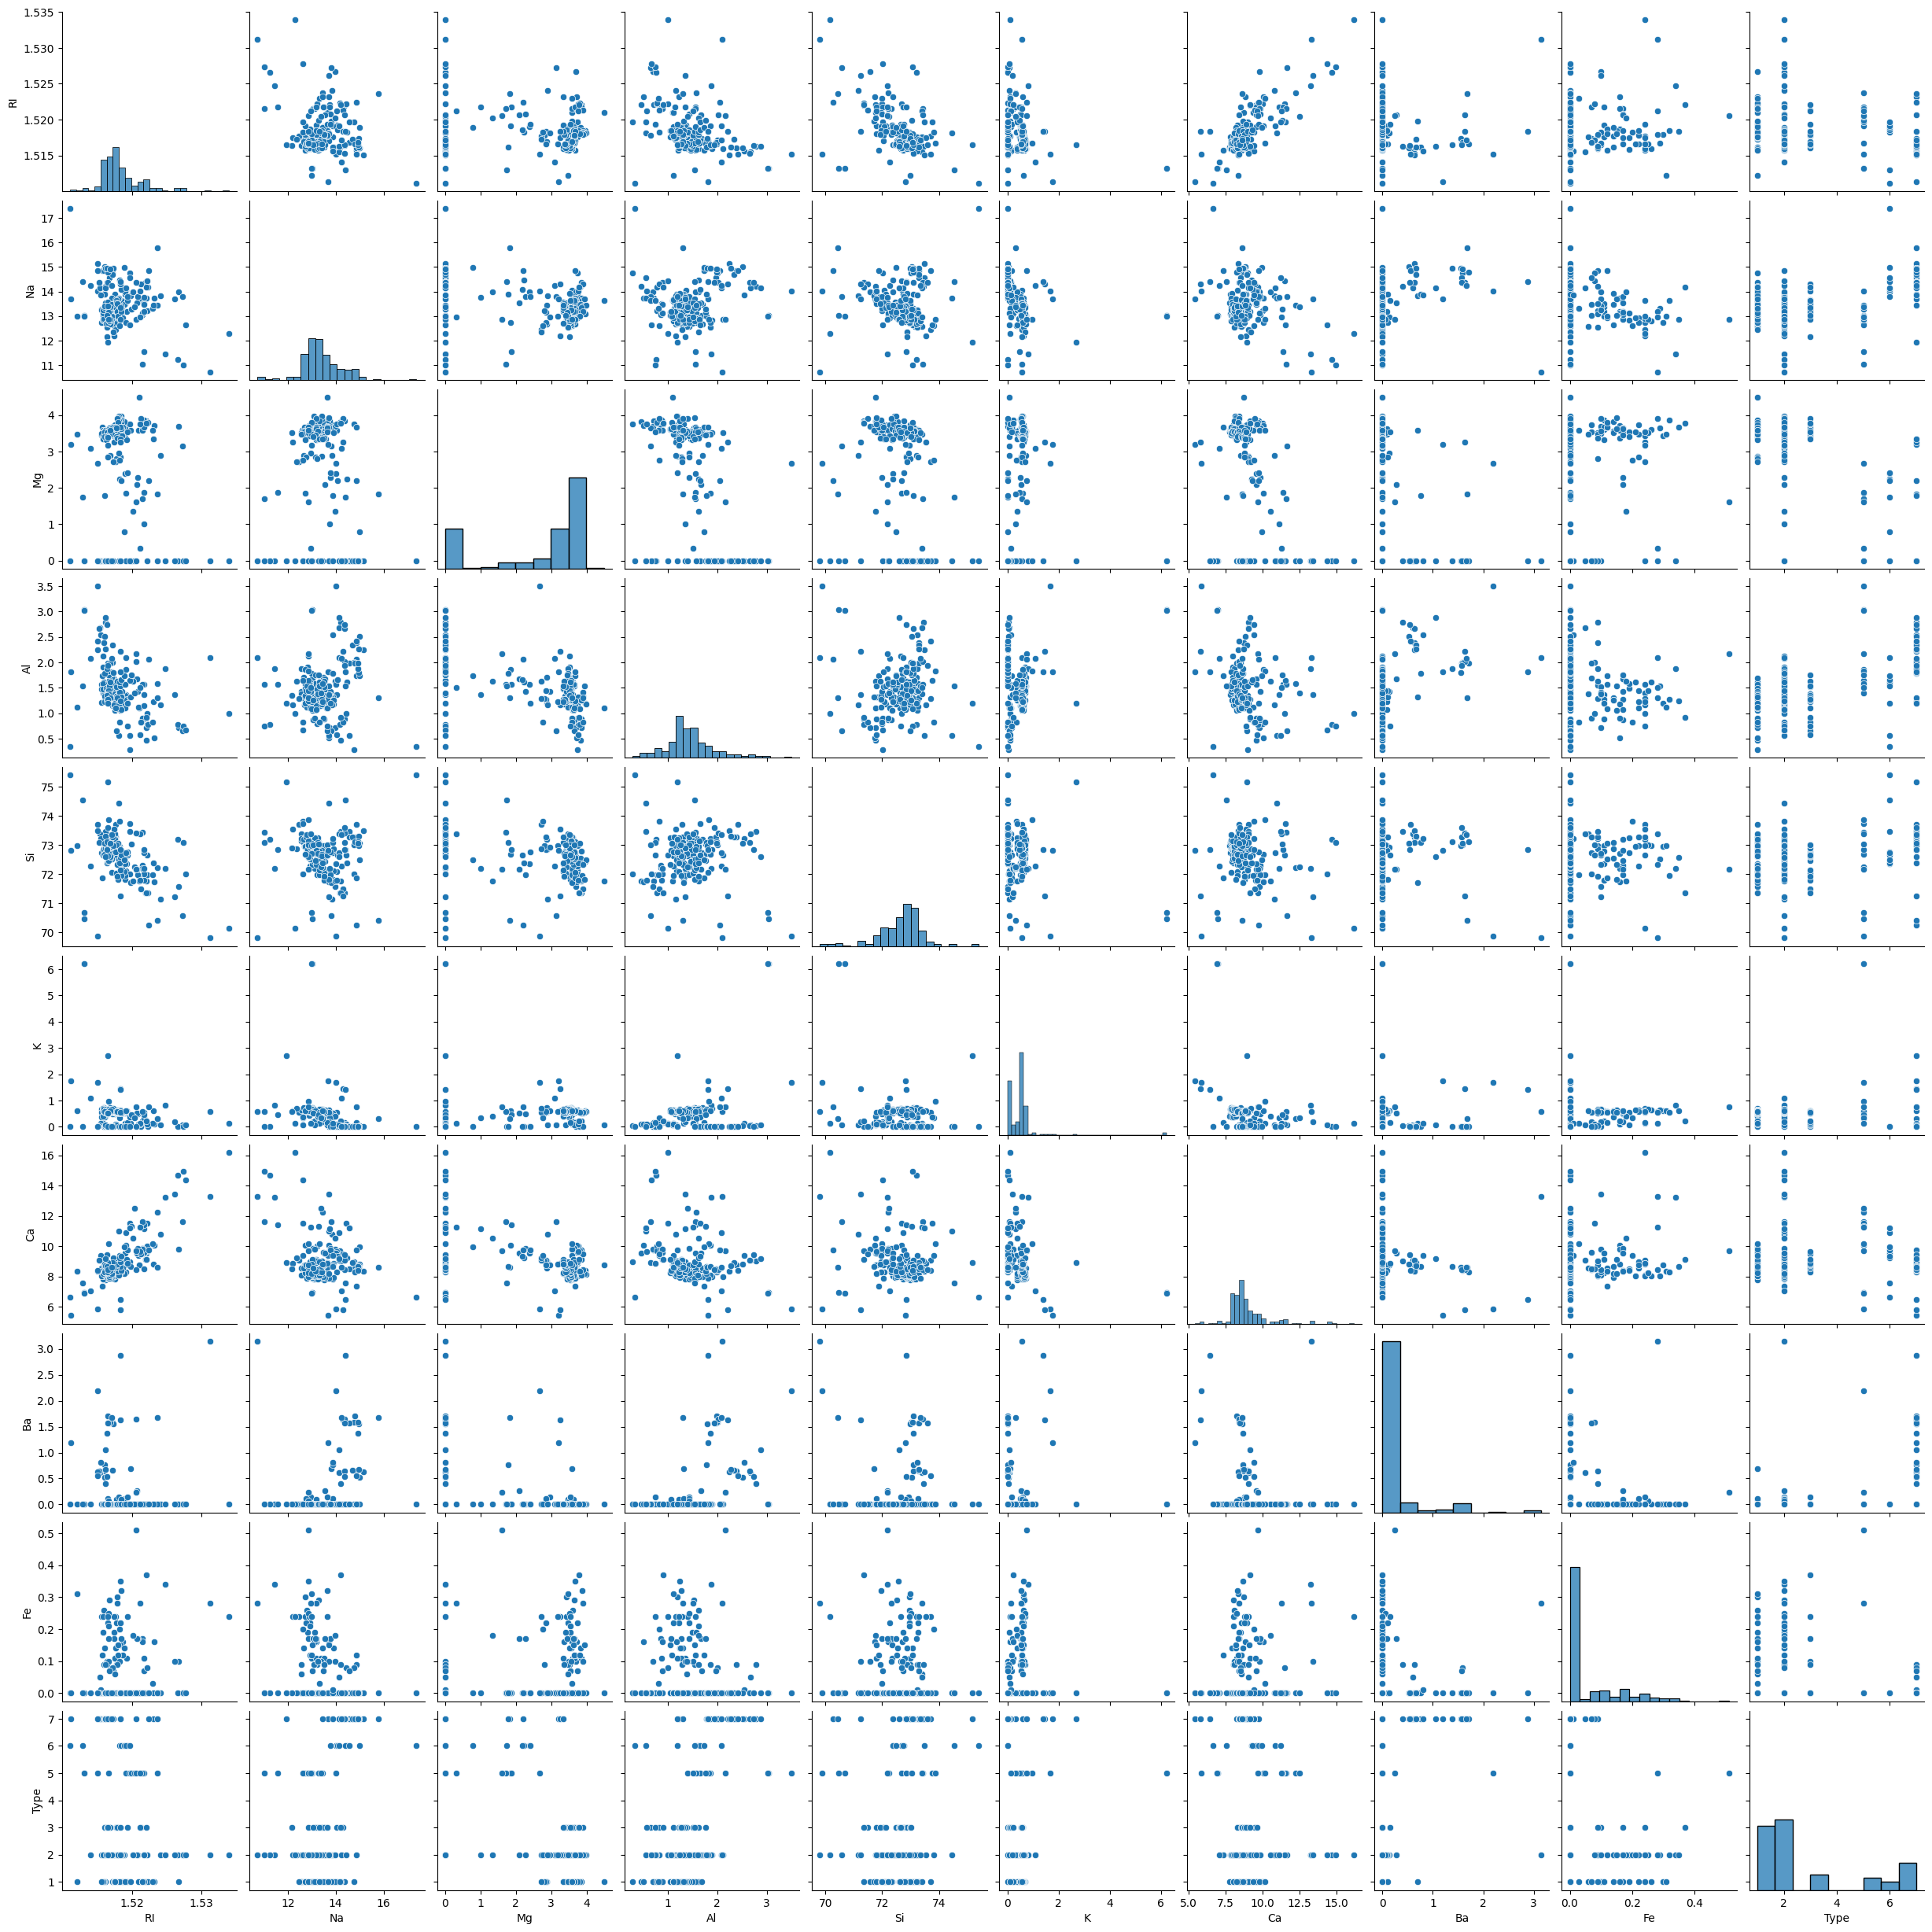

In [48]:
sns.pairplot(glass)

#**Conclusion**
##The dataset was cleaned by removing duplicates and outliers. The data was then standardized using the Standard Scaler. Grid Search was performed to find the best 'k' value for the KNN algorithm. The accuracy of the KNN models improved as 'k' increased beyond 3, indicating better performance.